In [53]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [32]:
crime_data = pd.read_csv(Path('crime_data.csv'))

/var/folders/j4/7sc4jfqx7_l9y_4px8d0cn1w0000gn/T/ipykernel_17970/290000478.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_data = pd.read_csv(Path('crime_data.csv'))


In [33]:
crime_data=crime_data.dropna()

In [34]:
crime_data.keys()


Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT',
       'CMPLNT_TO_TM', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD', 'PD_DESC',
       'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'JURIS_DESC', 'BORO_NM',
       'ADDR_PCT_CD', 'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'PARKS_NM',
       'HADEVELOPT', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude',
       'Lat_Lon'],
      dtype='object')

In [35]:
crime_data.tail()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
704541,260543857,7/17/2014,18:30:00,7/17/2014,18:30:00,7/17/2014,359,OFFENSES AGAINST PUBLIC ADMINI,750.0,RESISTING ARREST,...,79.0,OPPOSITE OF,RESIDENCE - PUBLIC HOUSING,SUMNER PLAYGROUND,SUMNER,1001477.0,193239.0,40.697065,-73.937876,"(40.697064637, -73.937875815)"
709635,487186695,7/13/2014,20:30:00,7/13/2014,20:45:00,7/14/2014,109,GRAND LARCENY,439.0,"LARCENY,GRAND FROM OPEN AREAS, UNATTENDED",...,5.0,REAR OF,RESIDENCE - PUBLIC HOUSING,CATHERINE SLIP MALLS,SMITH,985237.0,197940.0,40.709984,-73.996441,"(40.70998449, -73.996441344)"
713615,330740886,7/11/2014,1:10:00,7/11/2014,1:21:00,7/11/2014,118,DANGEROUS WEAPONS,793.0,WEAPONS POSSESSION 3,...,69.0,OPPOSITE OF,RESIDENCE - PUBLIC HOUSING,BREUKELEN BALLFIELDS,BREUKELEN,1013655.0,177161.0,40.652902,-73.894029,"(40.652902087, -73.89402854)"
715850,919428487,7/9/2014,21:15:00,7/9/2014,21:26:00,7/9/2014,352,CRIMINAL TRESPASS,203.0,"TRESPASS 3, CRIMINAL",...,43.0,OPPOSITE OF,RESIDENCE - PUBLIC HOUSING,WATSON GLEASON PLAYGROUND,BRONXDALE,1020586.0,240735.0,40.827371,-73.868706,"(40.827370965, -73.868706492)"
717414,213481643,7/8/2014,20:50:00,7/8/2014,21:10:00,7/8/2014,236,DANGEROUS WEAPONS,782.0,"WEAPONS, POSSESSION, ETC",...,76.0,REAR OF,RESIDENCE - PUBLIC HOUSING,COFFEY PARK,RED HOOK WEST,982015.0,185874.0,40.676866,-74.008059,"(40.676865878, -74.008059071)"


In [36]:
crime_data=crime_data.rename(columns={'CMPLNT_NUM':"Complaint ID",
                                       'CMPLNT_FR_DT': "Crime Date",
                                       'CMPLNT_FR_TM':"Complaint Time",
                                         'CMPLNT_TO_DT':"Ending Date",
                                        'CMPLNT_TO_TM':"Ending Time", 
                                        'RPT_DT':"Reported Date",
                                        'KY_CD':"Offense Code",
                                        'OFNS_DESC':"Offense Description",
                                        'PD_CD':"Classification Code",
                                        'PD_DESC':"Classification Description",
                                        'CRM_ATPT_CPTD_CD':"Crime Status",
                                        'LAW_CAT_CD':"Offense Level", 
                                        'JURIS_DESC':"Jurisdiction",
                                        'BORO_NM':"Borough",
                                        'ADDR_PCT_CD':"Precinct",
                                        'LOC_OF_OCCUR_DESC':"Location Description", 
                                        'PREM_TYP_DESC':"Premise Description",
                                        'PARKS_NM':"Park Name",
                                        'HADEVELOPT':"Name of NYCHA Housing", 
                                        'X_COORD_CD':"X Coordinate", 
                                        'Y_COORD_CD':"Y Coordinate",
                                        'Latitude':"Latitude",
                                         'Longitude':"Longitude",
                                        })
      

In [37]:
crime_data.tail()

,Complaint ID,Crime Date,Complaint Time,Ending Date,Ending Time,Reported Date,Offense Code,Offense Description,Classification Code,Classification Description,...,Precinct,Location Description,Premise Description,Park Name,Name of NYCHA Housing,X Coordinate,Y Coordinate,Latitude,Longitude,Lat_Lon
704541,260543857,7/17/2014,18:30:00,7/17/2014,18:30:00,7/17/2014,359,OFFENSES AGAINST PUBLIC ADMINI,750.0,RESISTING ARREST,...,79.0,OPPOSITE OF,RESIDENCE - PUBLIC HOUSING,SUMNER PLAYGROUND,SUMNER,1001477.0,193239.0,40.697065,-73.937876,"(40.697064637, -73.937875815)"
709635,487186695,7/13/2014,20:30:00,7/13/2014,20:45:00,7/14/2014,109,GRAND LARCENY,439.0,"LARCENY,GRAND FROM OPEN AREAS, UNATTENDED",...,5.0,REAR OF,RESIDENCE - PUBLIC HOUSING,CATHERINE SLIP MALLS,SMITH,985237.0,197940.0,40.709984,-73.996441,"(40.70998449, -73.996441344)"
713615,330740886,7/11/2014,1:10:00,7/11/2014,1:21:00,7/11/2014,118,DANGEROUS WEAPONS,793.0,WEAPONS POSSESSION 3,...,69.0,OPPOSITE OF,RESIDENCE - PUBLIC HOUSING,BREUKELEN BALLFIELDS,BREUKELEN,1013655.0,177161.0,40.652902,-73.894029,"(40.652902087, -73.89402854)"
715850,919428487,7/9/2014,21:15:00,7/9/2014,21:26:00,7/9/2014,352,CRIMINAL TRESPASS,203.0,"TRESPASS 3, CRIMINAL",...,43.0,OPPOSITE OF,RESIDENCE - PUBLIC HOUSING,WATSON GLEASON PLAYGROUND,BRONXDALE,1020586.0,240735.0,40.827371,-73.868706,"(40.827370965, -73.868706492)"
717414,213481643,7/8/2014,20:50:00,7/8/2014,21:10:00,7/8/2014,236,DANGEROUS WEAPONS,782.0,"WEAPONS, POSSESSION, ETC",...,76.0,REAR OF,RESIDENCE - PUBLIC HOUSING,COFFEY PARK,RED HOOK WEST,982015.0,185874.0,40.676866,-74.008059,"(40.676865878, -74.008059071)"


In [86]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Complaint ID                115 non-null    int64         
 1   Crime Date                  115 non-null    datetime64[ns]
 2   Complaint Time              115 non-null    datetime64[ns]
 3   Ending Date                 115 non-null    datetime64[ns]
 4   Ending Time                 115 non-null    datetime64[ns]
 5   Reported Date               115 non-null    datetime64[ns]
 6   Offense Code                115 non-null    int64         
 7   Offense Description         115 non-null    object        
 8   Classification Code         115 non-null    float64       
 9   Classification Description  115 non-null    object        
 10  Crime Status                115 non-null    object        
 11  Offense Level               115 non-null    object        

In [87]:
crime_data["Complaint Time"] = pd.to_datetime(crime_data["Complaint Time"])
crime_data["Ending Time"] = pd.to_datetime(crime_data["Ending Time"])
crime_data["Reported Date"] = pd.to_datetime(crime_data["Reported Date"])
crime_data["Crime Date"] = pd.to_datetime(crime_data["Crime Date"])
crime_data["Ending Date"] = pd.to_datetime(crime_data["Ending Date"])

In [88]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Complaint ID                115 non-null    int64         
 1   Crime Date                  115 non-null    datetime64[ns]
 2   Complaint Time              115 non-null    datetime64[ns]
 3   Ending Date                 115 non-null    datetime64[ns]
 4   Ending Time                 115 non-null    datetime64[ns]
 5   Reported Date               115 non-null    datetime64[ns]
 6   Offense Code                115 non-null    int64         
 7   Offense Description         115 non-null    object        
 8   Classification Code         115 non-null    float64       
 9   Classification Description  115 non-null    object        
 10  Crime Status                115 non-null    object        
 11  Offense Level               115 non-null    object        

In [41]:
crime_data.head()

,Complaint ID,Crime Date,Complaint Time,Ending Date,Ending Time,Reported Date,Offense Code,Offense Description,Classification Code,Classification Description,...,Precinct,Location Description,Premise Description,Park Name,Name of NYCHA Housing,X Coordinate,Y Coordinate,Latitude,Longitude,Lat_Lon
12104,479888864,2015-12-21,2025-02-12 09:31:00,2015-12-21,2025-02-12 09:47:00,2015-12-21,106,FELONY ASSAULT,106.0,"ASSAULT 2,1,PEACE OFFICER",...,76.0,REAR OF,RESIDENCE - PUBLIC HOUSING,NICHOLAS NAQUAN HEYWARD JR. PARK,GOWANUS,987442.0,188309.0,40.683549,-73.988492,"(40.68354911, -73.988492488)"
15600,817223136,2015-12-18,2025-02-12 15:30:00,2015-12-18,2025-02-12 15:35:00,2015-12-18,105,ROBBERY,386.0,"ROBBERY,PERSONAL ELECTRONIC DEVICE",...,88.0,OPPOSITE OF,PARK/PLAYGROUND,COMMODORE BARRY PARK,INGERSOLL,989927.0,192766.0,40.695781,-73.979529,"(40.695781306, -73.979528908)"
16575,144702604,2015-12-17,2025-02-12 22:30:00,2015-12-17,2025-02-12 22:56:00,2015-12-17,126,MISCELLANEOUS PENAL LAW,760.0,"BRIBERY,PUBLIC ADMINISTRATION",...,49.0,OPPOSITE OF,PARK/PLAYGROUND,BRONX PARK,PARKSIDE,1020965.0,255753.0,40.868589,-73.867255,"(40.86858934, -73.8672548)"
28742,426614014,2015-12-08,2025-02-12 20:50:00,2015-12-08,2025-02-12 20:58:00,2015-12-08,236,DANGEROUS WEAPONS,782.0,"WEAPONS, POSSESSION, ETC",...,32.0,REAR OF,PARK/PLAYGROUND,COLONEL CHARLES YOUNG TRIANGLE,HARLEM RIVER,1001650.0,240575.0,40.826989,-73.937129,"(40.826989411, -73.93712941)"
43263,598084040,2015-11-27,2025-02-12 11:25:00,2015-11-27,2025-02-12 11:30:00,2015-11-27,235,DANGEROUS DRUGS,567.0,"MARIJUANA, POSSESSION 4 & 5",...,75.0,OPPOSITE OF,RESIDENCE - PUBLIC HOUSING,LINDEN PARK,LINDEN,1015829.0,179159.0,40.658379,-73.886184,"(40.658378671, -73.886184297)"


In [42]:
crime_data=crime_data.reset_index(drop=True)
crime_data.head()

,Complaint ID,Crime Date,Complaint Time,Ending Date,Ending Time,Reported Date,Offense Code,Offense Description,Classification Code,Classification Description,...,Precinct,Location Description,Premise Description,Park Name,Name of NYCHA Housing,X Coordinate,Y Coordinate,Latitude,Longitude,Lat_Lon
0,479888864,2015-12-21,2025-02-12 09:31:00,2015-12-21,2025-02-12 09:47:00,2015-12-21,106,FELONY ASSAULT,106.0,"ASSAULT 2,1,PEACE OFFICER",...,76.0,REAR OF,RESIDENCE - PUBLIC HOUSING,NICHOLAS NAQUAN HEYWARD JR. PARK,GOWANUS,987442.0,188309.0,40.683549,-73.988492,"(40.68354911, -73.988492488)"
1,817223136,2015-12-18,2025-02-12 15:30:00,2015-12-18,2025-02-12 15:35:00,2015-12-18,105,ROBBERY,386.0,"ROBBERY,PERSONAL ELECTRONIC DEVICE",...,88.0,OPPOSITE OF,PARK/PLAYGROUND,COMMODORE BARRY PARK,INGERSOLL,989927.0,192766.0,40.695781,-73.979529,"(40.695781306, -73.979528908)"
2,144702604,2015-12-17,2025-02-12 22:30:00,2015-12-17,2025-02-12 22:56:00,2015-12-17,126,MISCELLANEOUS PENAL LAW,760.0,"BRIBERY,PUBLIC ADMINISTRATION",...,49.0,OPPOSITE OF,PARK/PLAYGROUND,BRONX PARK,PARKSIDE,1020965.0,255753.0,40.868589,-73.867255,"(40.86858934, -73.8672548)"
3,426614014,2015-12-08,2025-02-12 20:50:00,2015-12-08,2025-02-12 20:58:00,2015-12-08,236,DANGEROUS WEAPONS,782.0,"WEAPONS, POSSESSION, ETC",...,32.0,REAR OF,PARK/PLAYGROUND,COLONEL CHARLES YOUNG TRIANGLE,HARLEM RIVER,1001650.0,240575.0,40.826989,-73.937129,"(40.826989411, -73.93712941)"
4,598084040,2015-11-27,2025-02-12 11:25:00,2015-11-27,2025-02-12 11:30:00,2015-11-27,235,DANGEROUS DRUGS,567.0,"MARIJUANA, POSSESSION 4 & 5",...,75.0,OPPOSITE OF,RESIDENCE - PUBLIC HOUSING,LINDEN PARK,LINDEN,1015829.0,179159.0,40.658379,-73.886184,"(40.658378671, -73.886184297)"


<Axes: title={'center': 'Complaint Rate by Borough'}>

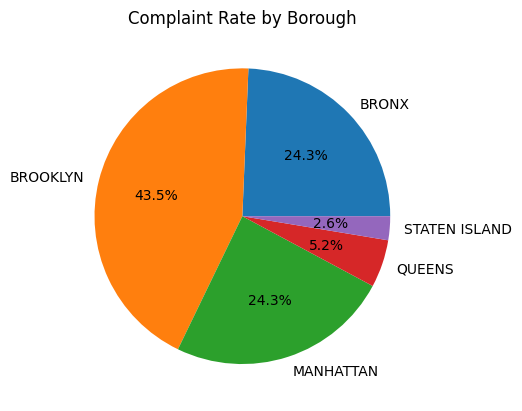

In [98]:
emrah1=crime_data.groupby(by="Borough").count()

emrah1["Crime Date"].plot(kind='pie', title='Complaint Rate by Borough', autopct='%1.1f%%', ylabel='')

In [90]:
def get_season(date):
    year = date.year
    seasons = {'Spring': pd.date_range(start=f'{year}-03-21', end=f'{year}-06-20'),
               'Summer': pd.date_range(start=f'{year}-06-21', end=f'{year}-09-22'),
               'Fall': pd.date_range(start=f'{year}-09-23', end=f'{year}-12-20'),
               'Winter': pd.date_range(start=f'{year}-12-21', end=f'{year+1}-03-20')}
    if date in seasons['Spring']:
        return 'Spring'
    elif date in seasons['Summer']:
        return 'Summer'
    elif date in seasons['Fall']:
        return 'Fall'
    else:
        return 'Winter'

crime_data['Season'] = crime_data['Crime Date'].apply(get_season)
crime_data.head()
crime_data['Season'] = crime_data['Crime Date'].apply(get_season)

In [91]:
crime_data.head()

,Complaint ID,Crime Date,Complaint Time,Ending Date,Ending Time,Reported Date,Offense Code,Offense Description,Classification Code,Classification Description,...,Park Name,Name of NYCHA Housing,X Coordinate,Y Coordinate,Latitude,Longitude,Lat_Lon,Season,Complaint Hour,Complaint Day
0,479888864,2015-12-21,2025-02-12 09:31:00,2015-12-21,2025-02-12 09:47:00,2015-12-21,106,FELONY ASSAULT,106.0,"ASSAULT 2,1,PEACE OFFICER",...,NICHOLAS NAQUAN HEYWARD JR. PARK,GOWANUS,987442.0,188309.0,40.683549,-73.988492,"(40.68354911, -73.988492488)",Winter,9,Monday
1,817223136,2015-12-18,2025-02-12 15:30:00,2015-12-18,2025-02-12 15:35:00,2015-12-18,105,ROBBERY,386.0,"ROBBERY,PERSONAL ELECTRONIC DEVICE",...,COMMODORE BARRY PARK,INGERSOLL,989927.0,192766.0,40.695781,-73.979529,"(40.695781306, -73.979528908)",Fall,15,Friday
2,144702604,2015-12-17,2025-02-12 22:30:00,2015-12-17,2025-02-12 22:56:00,2015-12-17,126,MISCELLANEOUS PENAL LAW,760.0,"BRIBERY,PUBLIC ADMINISTRATION",...,BRONX PARK,PARKSIDE,1020965.0,255753.0,40.868589,-73.867255,"(40.86858934, -73.8672548)",Fall,22,Thursday
3,426614014,2015-12-08,2025-02-12 20:50:00,2015-12-08,2025-02-12 20:58:00,2015-12-08,236,DANGEROUS WEAPONS,782.0,"WEAPONS, POSSESSION, ETC",...,COLONEL CHARLES YOUNG TRIANGLE,HARLEM RIVER,1001650.0,240575.0,40.826989,-73.937129,"(40.826989411, -73.93712941)",Fall,20,Tuesday
4,598084040,2015-11-27,2025-02-12 11:25:00,2015-11-27,2025-02-12 11:30:00,2015-11-27,235,DANGEROUS DRUGS,567.0,"MARIJUANA, POSSESSION 4 & 5",...,LINDEN PARK,LINDEN,1015829.0,179159.0,40.658379,-73.886184,"(40.658378671, -73.886184297)",Fall,11,Friday


<Axes: title={'center': 'Complaints Totals by Season'}, xlabel='Season'>

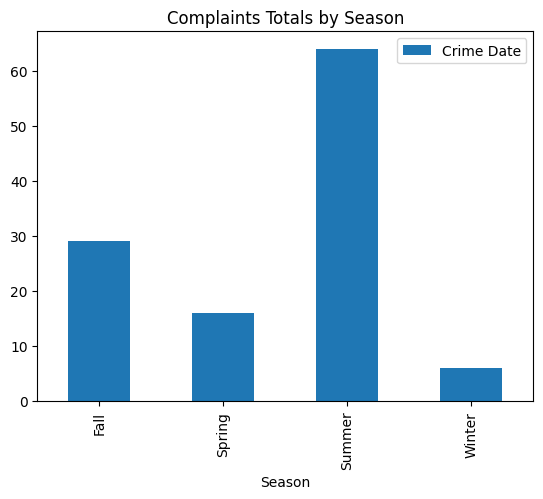

In [81]:
crime_by_seasons = crime_data.groupby('Season').count()
crime_by_seasons.plot(kind='bar', y='Crime Date', title='Complaints Totals by Season')

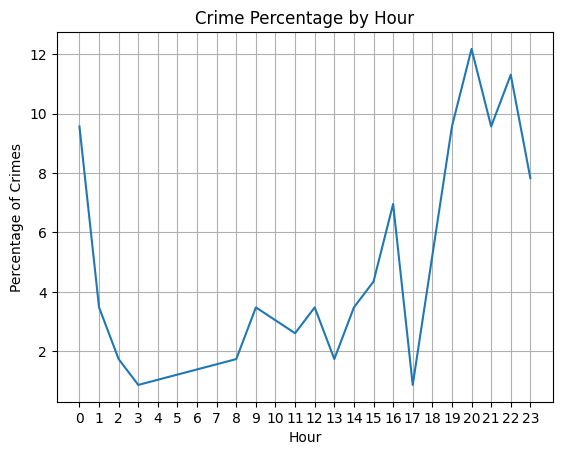

In [94]:



crime_by_hour = crime_data.groupby('Complaint Hour').count()


crime_by_hour['Percentage'] = (crime_by_hour['Complaint ID'] / crime_by_hour['Complaint ID'].sum()) * 100


ax = crime_by_hour['Percentage'].plot(kind='line', title='Crime Percentage by Hour', xlabel='Hour', ylabel='Percentage of Crimes', grid=True)


ax.set_xticks(range(0, 24))

plt.show()

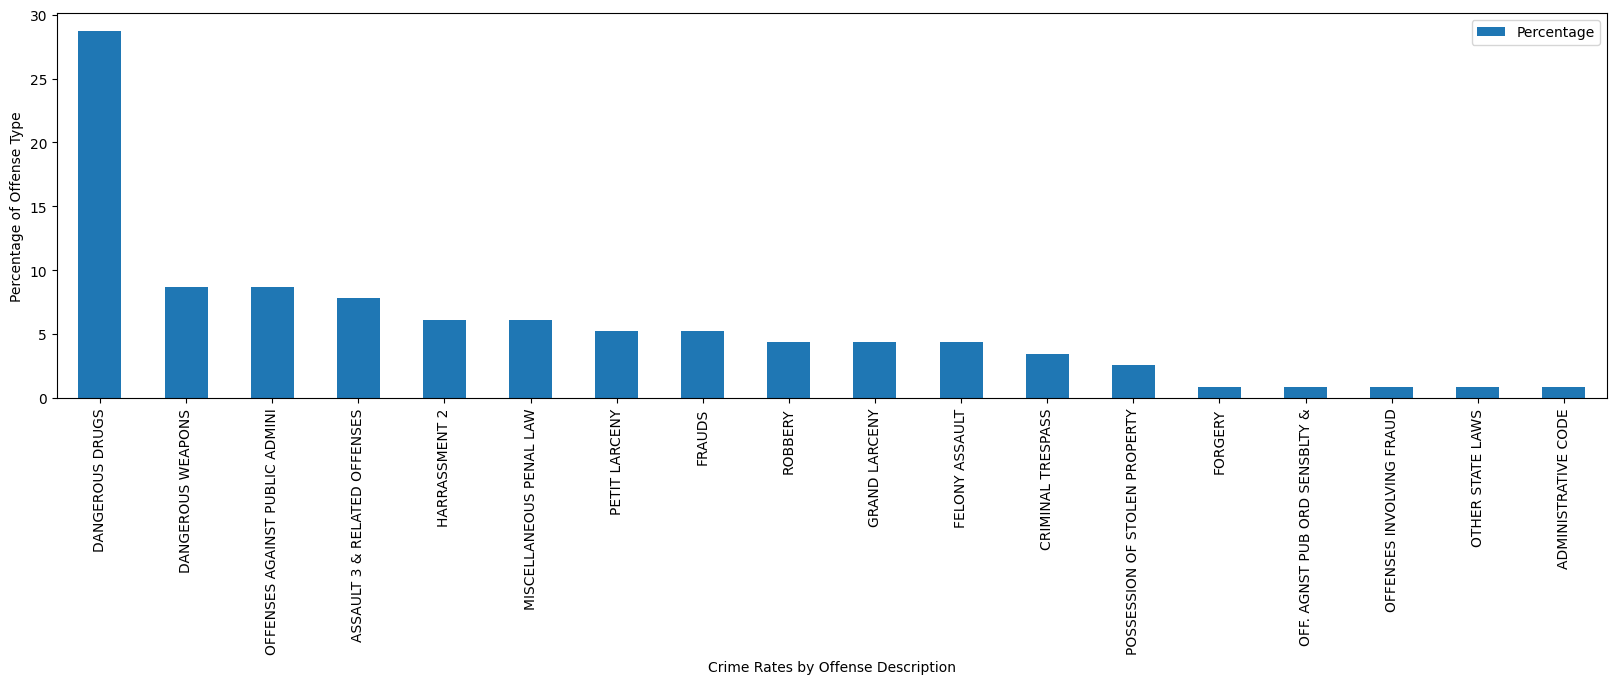

In [95]:

crime_type = crime_data.groupby(by="Offense Description").count().sort_values(by="Complaint ID", ascending=False)
crime_type['Percentage'] = (crime_type['Complaint ID'] / crime_type['Complaint ID'].sum()) * 100


crime_type.plot(kind="bar", y="Percentage", xlabel="Crime Rates by Offense Description", ylabel="Percentage of Offense Type", figsize=(20, 5))
plt.show()

/var/folders/j4/7sc4jfqx7_l9y_4px8d0cn1w0000gn/T/ipykernel_17970/1977276136.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  crime_by_week = crime_data.groupby('Complaint Day').count().sort_values(by='Complaint Day')


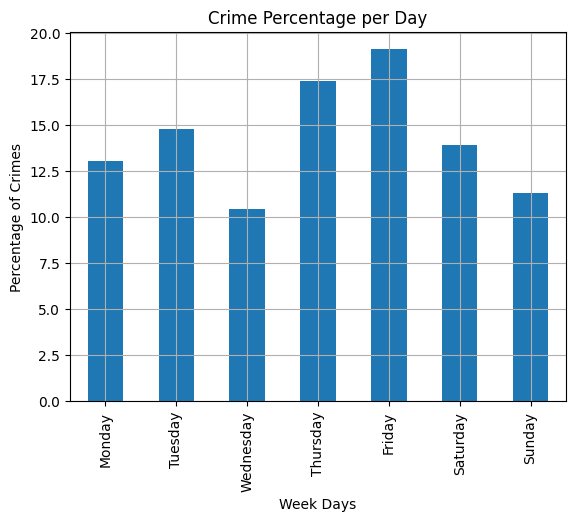

In [96]:

days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]


crime_data['Complaint Day'] = pd.Categorical(crime_data['Complaint Day'], categories=days_order, ordered=True)


crime_by_week = crime_data.groupby('Complaint Day').count().sort_values(by='Complaint Day')


crime_by_week['Percentage'] = (crime_by_week['Complaint ID'] / crime_by_week['Complaint ID'].sum()) * 100


ax = crime_by_week['Percentage'].plot(kind='bar', title='Crime Percentage per Day', xlabel='Week Days', ylabel='Percentage of Crimes', grid=True)
plt.show()